# 머신러닝 - SVM 파라미터 튜닝
  

**2019-2023 [FinanceData.KR]()**


In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 2], [5, 2], [2, 3], [-3, -2], [-4, -2], [-6, -3], [-3, -1]])
y = np.array([1, 1, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.svm import SVC

clf = SVC() # 기본값: C=1.0, kernel='rbf'
clf.fit(X, y)

clf.predict([[-1, -1]])

array([0])

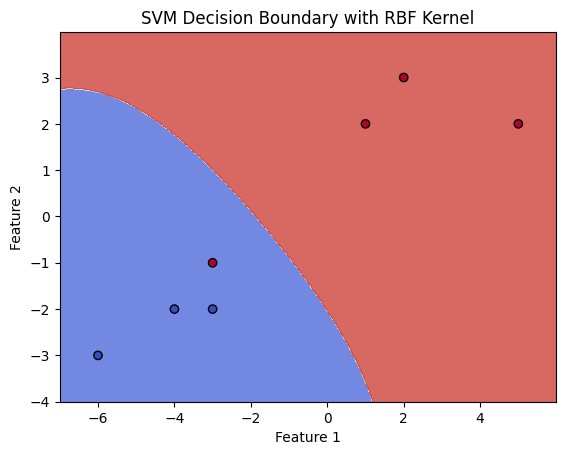

In [ ]:
#@title SVM 경계결정 시각화
# Meshgrid for visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class for each mesh point
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
clf

SVC()

학습후 모델에서 사용할 수 있는 속성

* support_ : 서포트 벡터의 인덱스. 서포트 벡터 수만큼의 길이를 가지는 배열
* support_vectors_ : 서포트 벡터 데이터. 서포트 벡터 수 x 피처 수의 행렬
* n_support_ : 각클래스별 서포트 벡터 수
* dual_coef_ : 결정함수에 기여하는 서포트 벡터의 계수

In [ ]:
clf.support_vectors_

array([[-3., -2.],
       [-4., -2.],
       [-6., -3.],
       [ 1.,  2.],
       [ 5.,  2.],
       [-3., -1.]])

In [ ]:
clf.n_support_

array([3, 3], dtype=int32)

In [ ]:
clf.dual_coef_

array([[-1.        , -0.82847586, -0.41587296,  0.63729996,  0.60704887,
         1.        ]])

## 파라미터에 따른 결정경계

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 주어진 데이터
X = np.array([[1, 2], [5, 2], [2, 3], [-3, -2], [-4, -2], [-6, -3], [-3, -1]])
y = np.array([1, 1, 1, 0, 0, 0, 1])

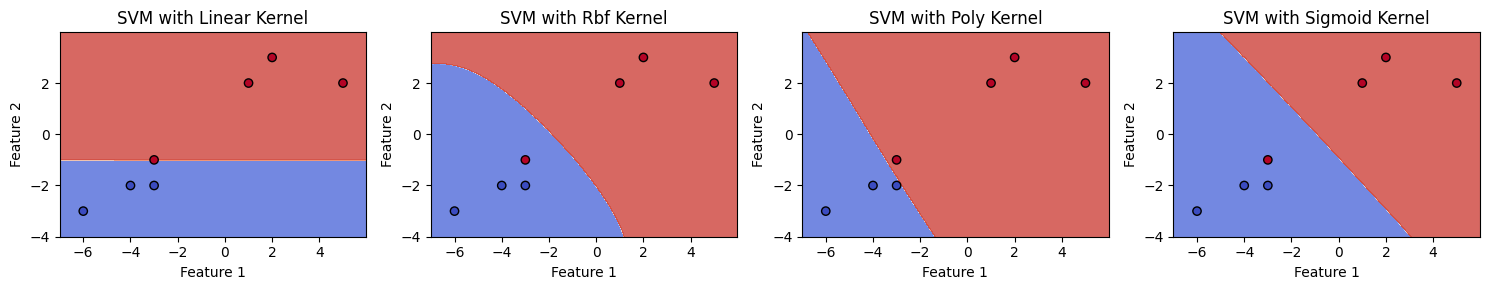

In [ ]:
#@title 커널별 시각화

# 시각화용 메시그리드 생성
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 커널 유형
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# 커널별로 시각화
fig, axes = plt.subplots(1, len(kernels), figsize=(15, 3))

for i, kernel in enumerate(kernels):
    # SVM 모델 생성
    clf = SVC(kernel=kernel, gamma='scale')
    clf.fit(X, y)

    # 각 모델의 결정 경계 예측
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f'SVM with {kernel.capitalize()} Kernel')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

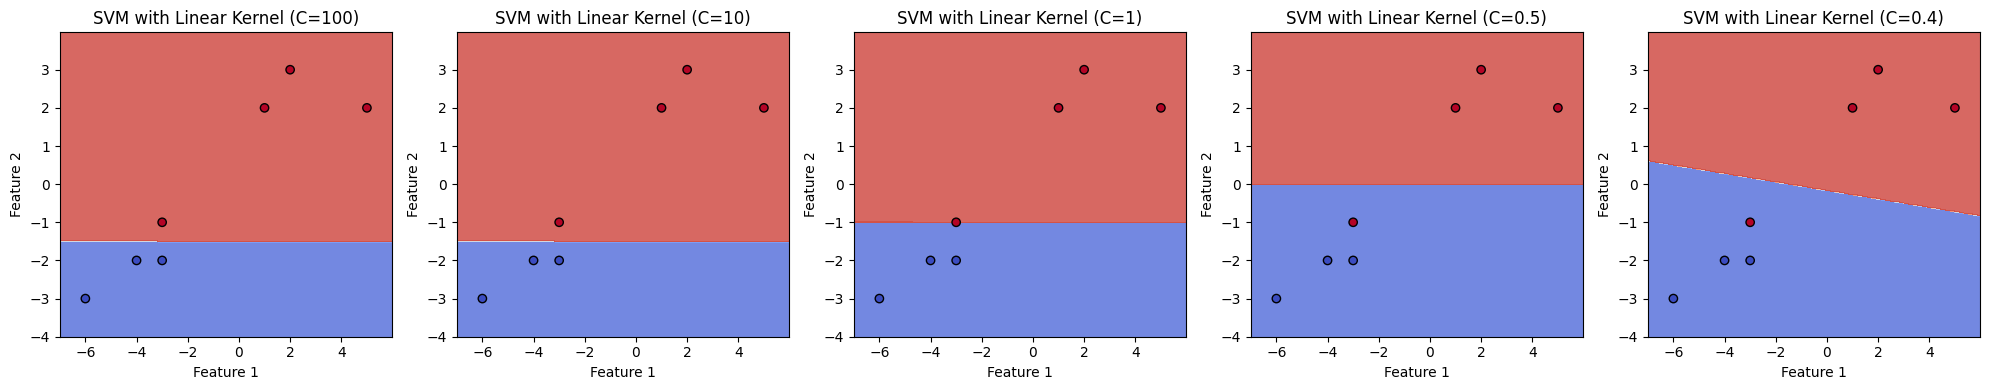

In [ ]:
#@title C 값에 따른 결정경계
# 시각화용 메시그리드 생성
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 주어진 C 값들
c_list = [100, 10, 1, 0.5, 0.4]

# 선형 커널
kernel = 'linear'

# C 값들에 대한 SVM 모델 시각화
fig, axes = plt.subplots(1, len(c_list), figsize=(20, 4))

for i, C in enumerate(c_list):
    # SVM 모델 생성
    clf = SVC(C=C, kernel=kernel)
    clf.fit(X, y)

    # 각 모델의 결정 경계 예측
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f'SVM with {kernel.capitalize()} Kernel (C={C})')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


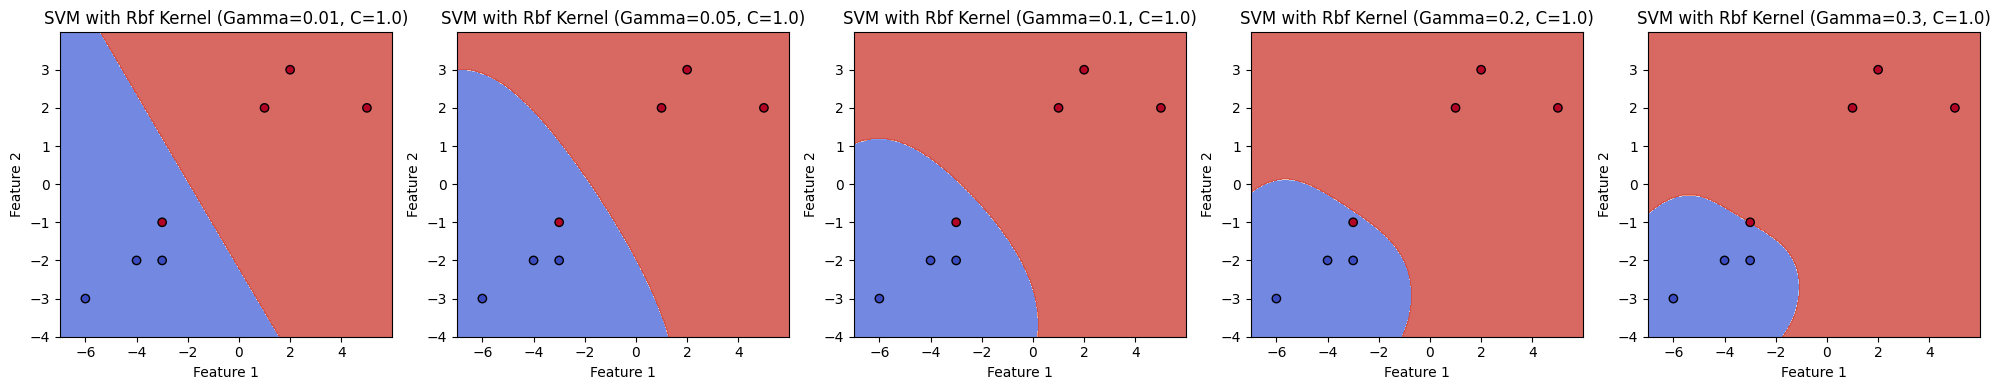

In [ ]:
#@title gamma에 따른 결정경계

# 시각화용 메시그리드 생성
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 주어진 gamma 값들과 C 값
gamma_list = [0.01, 0.05, 0.1, 0.2, 0.3]
kernel, C = 'rbf', 1.0

# gamma 값들에 대한 SVM 모델 시각화
fig, axes = plt.subplots(1, len(gamma_list), figsize=(20, 4))

for i, gamma in enumerate(gamma_list):
    # SVM 모델 생성
    clf = SVC(C=C, kernel=kernel, gamma=gamma)
    clf.fit(X, y)

    # 각 모델의 결정 경계 예측
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f'SVM with {kernel.capitalize()} Kernel (Gamma={gamma}, C={C})')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


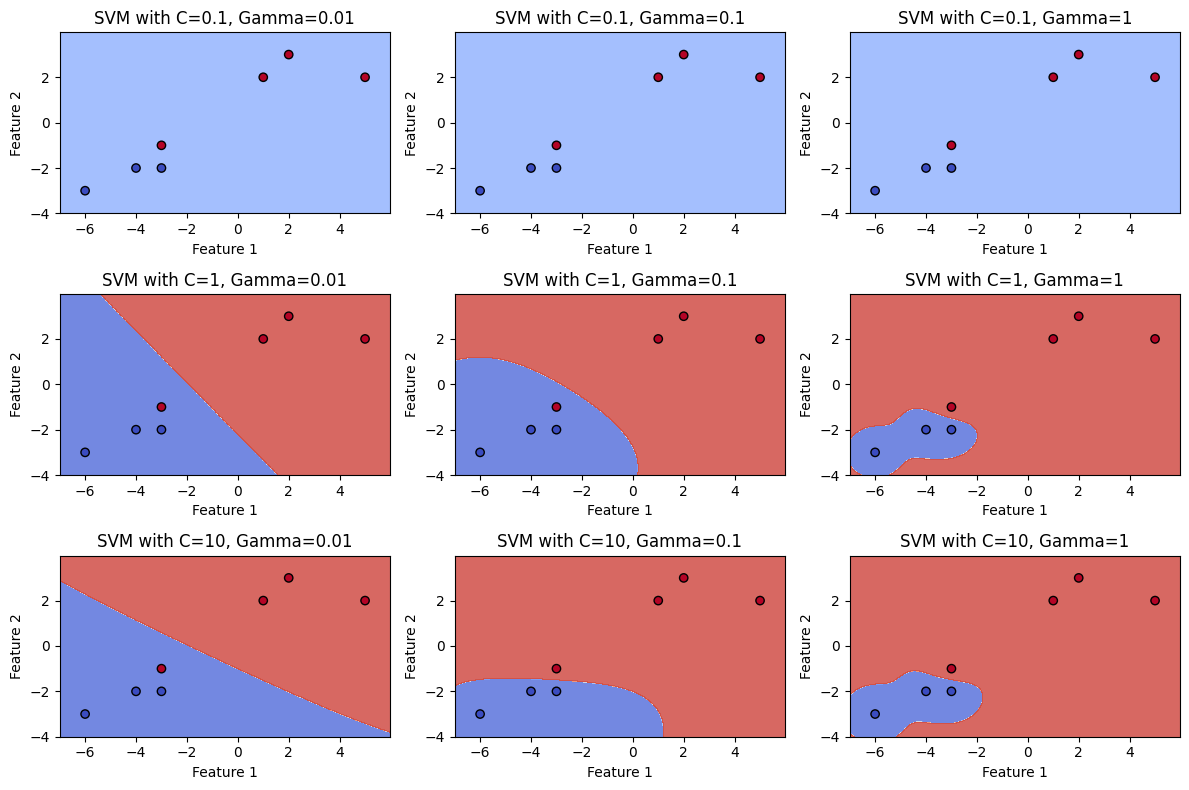

In [ ]:
#@title C와 gamma 값들의 조합

# 시각화용 메시그리드 생성
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 주어진 C와 gamma 값들의 조합
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]

# C와 gamma 값의 조합에 대한 SVM 모델 시각화
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(12, 8))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # SVM 모델 생성
        clf = SVC(C=C, kernel='rbf', gamma=gamma)
        clf.fit(X, y)

        # 각 모델의 결정 경계 예측
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # 시각화
        axes[i, j].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
        axes[i, j].set_title(f'SVM with C={C}, Gamma={gamma}')
        axes[i, j].set_xlabel('Feature 1')
        axes[i, j].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

----
**2019-2023 [FinanceData.KR]()**
